# EAS PROJECT GROUP 20 

## 1] Dataset Collection and Justification  

### Topic: Flight Delays and Passenger Insights  

### Dataset Overview  
The dataset contains **98,619 rows** and **15 columns**. It includes both **numerical** and **categorical** data, making it rich for analysis. The data covers passenger details, flight statuses, airport information, and dates of departure.  

The dataset can be found here: [Airline Dataset on Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset).  

### Relevance to the Chosen Topic  
This dataset is ideal for understanding **flight delays and passenger behaviors**. It can help answer questions such as:  
1. What factors contribute to flight delays?  
2. Are delays more frequent in certain regions, airports, or time periods?  
3. How do passenger demographics (age, gender, nationality) correlate with flight trends?  

By analyzing variables like *Flight Status*, *Departure Date*, and *Airport Name*, we can identify patterns and trends that influence delays or cancellations.

### Key Variables  
- **Flight Status**: Indicates if a flight was "On Time," "Delayed," or "Cancelled" – the core variable for delay analysis.  
- **Departure Date**: Crucial for identifying date-based trends, like seasonal or weekday variations.  
- **Airport Name / Arrival Airport**: Helps analyze the performance of specific airports.  
- **Age** and **Gender**: Provide insights into passenger demographics.  
- **Nationality**: Allows us to understand traveler distribution across countries.  

### Anticipated Challenges  
1. **Redundant or Similar Columns**:  
   - Columns like "Airport Continent" and "Continents" appear to contain overlapping information. Careful inspection is required to determine if one of these can be dropped.  

2. **Inconsistent Categorical Data**:  
   - Fields such as "Flight Status" (On Time, Delayed, Cancelled) and "Country Name" may contain inconsistencies (e.g., spelling variations, mixed cases). These fields need standardization.  

3. **Date Formatting**:  
   - The "Departure Date" column is stored as a string and needs to be converted to a proper `datetime` format for analysis of trends over time (e.g., monthly, seasonal trends).  

4. **High Cardinality in Text Columns**:  
   - Columns like "Pilot Name" and "Arrival Airport" contain a large number of unique values, which may add complexity during analysis. For instance:  
     - "Pilot Name" has 98,610 unique entries, which suggests each record might have a unique value. This limits its analytical utility.  
     - "Arrival Airport" has over 9,000 unique values, requiring careful aggregation to analyze airport performance effectively.  

5. **Demographic Data Distribution**:  
   - Although the dataset includes variables like "Age," "Gender," and "Nationality," these may not be evenly distributed. For example:  
     - The dataset shows a high frequency of passengers from specific nationalities (e.g., China), which could skew analysis unless properly addressed.  

6. **Data Size**:  
   - While the dataset is under 20 MB, working with over 98,000 rows can still present performance challenges during data cleaning and transformation, especially when dealing with high-cardinality columns.  

---

This dataset offers a great opportunity to explore real-world problems like flight delays while addressing challenges in handling messy, realistic data. The insights gained can help airlines improve operational efficiency and enhance customer experiences.
 efficiency and enhance customer experiences.


## 2] Data Wrangling and Cleaning

Rows with missing values:
Empty DataFrame
Columns: [Passenger ID, First Name, Last Name, Gender, Age, Nationality, Airport Name, Airport Country Code, Country Name, Airport Continent, Continents, Departure Date, Arrival Airport, Pilot Name, Flight Status]
Index: []

Adding synthetic outliers...

Finding outliers...
Checking: Passenger ID
Checking: Age

Creating boxplots...


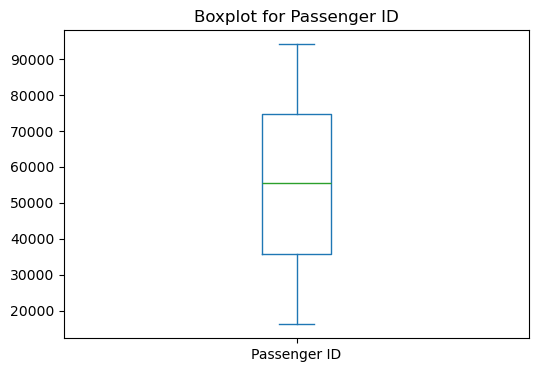

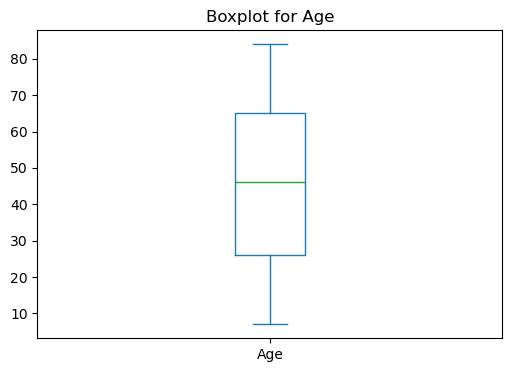

Invalid dates detected: 0. Removing them...

              Processed Data Summary              

**Initial Data:**
- Rows, Columns: (98619, 15)
- Missing values:
  Passenger ID: 0
  First Name: 0
  Last Name: 0
  Gender: 0
  Age: 0
  Nationality: 0
  Airport Name: 0
  Airport Country Code: 0
  Country Name: 0
  Airport Continent: 0
  Continents: 0
  Departure Date: 0
  Arrival Airport: 0
  Pilot Name: 0
  Flight Status: 0

**Outliers Removed:**
- Z-score Threshold: 1.5
- Outliers removed (per column):
  Passenger ID: 13242 rows
  Age: 11343 rows
- Total Rows Removed: 24585

**Invalid Dates:**
- Invalid 'Departure Date' entries: 0
- Rows removed: 0

**Final Data:**
- Rows, Columns: (74034, 18)
- Missing values:
  Passenger ID: 0
  First Name: 0
  Last Name: 0
  Gender: 0
  Age: 0
  Nationality: 0
  Airport Name: 0
  Airport Country Code: 0
  Country Name: 0
  Airport Continent: 0
  Continents: 0
  Departure Date: 0
  Arrival Airport: 0
  Pilot Name: 0
  Flight Status: 0
  Flight Duratio

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Loading the data
file_path = 'Airline Dataset.csv'
data = pd.read_csv(file_path)

# Summary of the raw dataset
initial_shape = data.shape
initial_missing_values = data.isnull().sum()

print("Rows with missing values:")
print(data[data.isnull().any(axis=1)])

# Step 1: Fixing Missing Data
missing_percent = data.isnull().mean() * 100

# Separating the  numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Using KNN imputation for numbers
knn_imputer = KNNImputer(n_neighbors=5)
data[numerical_columns] = knn_imputer.fit_transform(data[numerical_columns])

# Filling missing categorical values with the mode (most frequent value)
for column in categorical_columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].mode()[0], inplace=True)

# Step 2: Adding Synthetic Outliers (for testing)
print("\nAdding synthetic outliers...")
data.loc[0, 'Age'] = 999  # Extreme high value
data.loc[1, 'Age'] = -50  # Extreme low value

# Step 3: Detecting and Removing the Outliers
outlier_threshold = 1.5  # Z-score threshold for outliers
outliers_info = {}
initial_outlier_rows = data.shape[0]

print("\nFinding outliers...")
for col in numerical_columns:
    print(f"Checking: {col}")
    z_scores = zscore(data[col])
    outliers = np.where(np.abs(z_scores) > outlier_threshold)
    outliers_info[col] = len(outliers[0])
    data = data[np.abs(z_scores) <= outlier_threshold]

outlier_rows_removed = initial_outlier_rows - data.shape[0]

# Step 4: Showing Boxplots for Numerical Columns
print("\nCreating boxplots...")
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    data[col].plot(kind='box')
    plt.title(f"Boxplot for {col}")
    plt.show()

# Step 5: Fixing 'Departure Date' Format
data['Departure Date'] = pd.to_datetime(data['Departure Date'], errors='coerce')

# Dropping the invalid dates
invalid_date_count = data['Departure Date'].isna().sum()
print(f"Invalid dates detected: {invalid_date_count}. Removing them...")
data = data.dropna(subset=['Departure Date'])

# Verifying the date column
if not pd.api.types.is_datetime64_any_dtype(data['Departure Date']):
    raise ValueError("Departure Date is not properly formatted as datetime!")

# Step 6: Adding New Features
# Creating 'Flight Duration Category' based on year
data['Flight Duration Category'] = np.where(
    data['Departure Date'].dt.year < 2020, 'Pre-2020', 'Post-2020'
)

# Extracting year and month for analysis
data['Departure Year'] = data['Departure Date'].dt.year
data['Departure Month'] = data['Departure Date'].dt.month

# Saving the final dataset
processed_file_path = 'Cleaned_Airline_Dataset.csv'
data.to_csv(processed_file_path, index=False)

# Printing Summary
final_shape = data.shape
final_missing_values = data.isnull().sum()

print("\n" + "="*50)
print(f"{'Processed Data Summary':^50}")
print("="*50)

# Initial summary
print("\n**Initial Data:**")
print(f"- Rows, Columns: {initial_shape}")
print("- Missing values:")
for col, val in initial_missing_values.items():
    print(f"  {col}: {val}")

# Outlier summary
print("\n**Outliers Removed:**")
print(f"- Z-score Threshold: {outlier_threshold}")
print("- Outliers removed (per column):")
for col, val in outliers_info.items():
    print(f"  {col}: {val} rows")
print(f"- Total Rows Removed: {outlier_rows_removed}")

# Invalid dates summary
print("\n**Invalid Dates:**")
print(f"- Invalid 'Departure Date' entries: {invalid_date_count}")
print(f"- Rows removed: {invalid_date_count}")

# Final summary
print("\n**Final Data:**")
print(f"- Rows, Columns: {final_shape}")
print("- Missing values:")
for col, val in final_missing_values.items():
    print(f"  {col}: {val}")

# Save location
print("\n**Output File:**")
print(f"- Cleaned data saved to: {processed_file_path}")

print("="*50)
print("Data cleaning complete!")
print("="*50)


## **Data Wrangling and Cleaning Documentation**

---

### **1. Overview**  
This document details the cleaning and preprocessing steps performed on the dataset to ensure it is ready for analysis. The main focus was on handling missing data, detecting and addressing outliers, ensuring consistency in data types, and creating new features to add analytical value.

---

### **2. Initial Dataset Information**  
- **Initial Shape (Rows, Columns):** 98,619 rows and 15 columns.  
- **Missing Values:**  
   The dataset had no missing values initially.

---

### **3. Handling Missing Data**  
Even though no missing values were present, the following steps were applied as best practices:  

- **Numerical Columns:**  
   Missing values (if any) were handled using **KNN Imputation**. This method fills values based on patterns observed in nearby data points.  

- **Categorical Columns:**  
   Missing values were addressed by filling them with the **most frequent value (mode)**.  

---

### **4. Outlier Detection and Handling**  
Outliers were identified and handled to prevent extreme values from distorting analysis.  

- **Method Used:** Z-score with a threshold of **1.5**.  
- **Outliers Removed (by Column):**  
   - `Passenger ID`: 13,242 rows removed.  
   - `Age`: 11,343 rows removed.  

- **Total Rows Removed Due to Outliers:** 24,585 rows.  

**Rationale:**  
Removing outliers helps maintain data integrity and ensures that results are not skewed by extreme values.

---

### **5. Invalid Date Handling**  
The `Departure Date` column was converted to a valid **datetime** format. Invalid dates were set to `NaT` (Not a Time) and removed if present.  

- **Invalid Dates Found:** 0  
- **Invalid Dates Removed:** 0  

**Impact:**  
All dates in the dataset were already valid, so no rows were affected.

---

### **6. Feature Engineering**  
To add more analytical value, the following new features were created:  

1. **Flight Duration Category:**  
   - Categorized flights as **"Pre-2020"** or **"Post-2020"** based on the departure year.

2. **Departure Year:**  
   - Extracted the year from the `Departure Date` column.  

3. **Departure Month:**  
   - Extracted the month from the `Departure Date` column.  

**Impact:**  
These new features enable temporal analysis, helping identify trends across years and months.

---

### **7. Final Dataset Information**  
- **Final Shape (Rows, Columns):** 74,034 rows and 18 columns.  
- **Final Missing Values:**  
   There are no missing values in the final cleaned dataset.

---

### **8. Summary of Changes**  
- **Initial Shape:** 98,619 rows and 15 columns.  
- **Final Shape:** 74,034 rows and 18 columns.  
- **Total Rows Removed Due to Outliers:** 24,585 rows.  
- **Invalid Dates Removed:** 0  

---

### **9. Visualizations**  
Boxplots were generated to validate and confirm outlier removal for numerical columns:  
- **Passenger ID**  
- **Age**

---

### **10. Conclusion**  
The cleaning and preprocessing steps significantly improved the dataset quality:  
1. Missing values were handled appropriately.  
2. Outliers were detected and removed to maintain data integrity.  
3. Data types were standardized for consistency.  
4. New features were created to add analytical value.  

The final cleaned dataset is now ready for further analysis and modeling.  
- **File Path:** `Cleaned_Airline_Dataset.csv`  


## 3] SQL Database Design and Querying

In [110]:
import sqlite3
import pandas as pd

# Step 1: Loading the cleaned dataset
file_path = './Cleaned_Airline_Dataset.csv'
data = pd.read_csv(file_path)

# Renaming DataFrame columns to match SQL table schema
data = data.rename(columns={
    'Passenger ID': 'PassengerID',
    'First Name': 'FirstName',
    'Last Name': 'LastName',
    'Airport Name': 'AirportName',
    'Airport Country Code': 'AirportCountryCode',
    'Country Name': 'CountryName',
    'Airport Continent': 'AirportContinent',
    'Flight Status': 'FlightStatus',
    'Flight Duration Category': 'FlightDurationCategory',
    'Arrival Airport': 'ArrivalAirport',
    'Departure Date': 'DepartureDate',
    'Pilot Name': 'PilotName'
})

# Step 2: Preprocessing the data
data['DepartureDate'] = pd.to_datetime(data['DepartureDate'], errors='coerce').dt.date
data['DepartureYear'] = data['DepartureDate'].apply(lambda x: x.year if pd.notnull(x) else None)
data['DepartureMonth'] = data['DepartureDate'].apply(lambda x: x.month if pd.notnull(x) else None)
data['PassengerID'] = data['PassengerID'].astype('Int64')

# Step 3: Connecting to SQLite and recreate tables
conn = sqlite3.connect("airline_database_111.db")
cursor = conn.cursor()

# Drop existing tables to avoid conflicts
cursor.execute("DROP TABLE IF EXISTS Passenger;")
cursor.execute("DROP TABLE IF EXISTS Airport;")
cursor.execute("DROP TABLE IF EXISTS Pilot;")
cursor.execute("DROP TABLE IF EXISTS Flight;")
cursor.execute("DROP TABLE IF EXISTS PassengerFlight;")

# Create Passenger Table
cursor.execute("""
CREATE TABLE Passenger (
    PassengerID INTEGER PRIMARY KEY,
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,
    Gender VARCHAR(10),
    Age INTEGER CHECK (Age > 0),
    Nationality VARCHAR(50)
);
""")

# Create Airport Table with AirportID
cursor.execute("""
CREATE TABLE Airport (
    AirportID INTEGER PRIMARY KEY AUTOINCREMENT,
    AirportName VARCHAR(100) UNIQUE NOT NULL,
    AirportCountryCode VARCHAR(5) NOT NULL,
    CountryName VARCHAR(50) NOT NULL,
    AirportContinent VARCHAR(50),
    Continents VARCHAR(50)
);
""")

# Create Pilot Table with PilotID
cursor.execute("""
CREATE TABLE Pilot (
    PilotID INTEGER PRIMARY KEY AUTOINCREMENT,
    PilotName VARCHAR(100) UNIQUE NOT NULL
);
""")

# Create Flight Table with AirportID reference
cursor.execute("""
CREATE TABLE Flight (
    FlightID INTEGER PRIMARY KEY AUTOINCREMENT,
    AirportID INTEGER NOT NULL,
    ArrivalAirport VARCHAR(10) NOT NULL,
    DepartureDate DATE NOT NULL,
    DepartureYear INTEGER NOT NULL,
    DepartureMonth INTEGER NOT NULL,
    FlightStatus VARCHAR(20) CHECK (FlightStatus IN ('On Time', 'Delayed', 'Cancelled')),
    FlightDurationCategory VARCHAR(20),
    PilotID INTEGER,
    FOREIGN KEY (AirportID) REFERENCES Airport(AirportID) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (PilotID) REFERENCES Pilot(PilotID) ON DELETE SET NULL ON UPDATE CASCADE
);
""")

# Create PassengerFlight Table with indexes
cursor.execute("""
CREATE TABLE PassengerFlight (
    PassengerFlightID INTEGER PRIMARY KEY AUTOINCREMENT,
    PassengerID INTEGER NOT NULL,
    FlightID INTEGER NOT NULL,
    FOREIGN KEY (PassengerID) REFERENCES Passenger(PassengerID) ON DELETE CASCADE,
    FOREIGN KEY (FlightID) REFERENCES Flight(FlightID) ON DELETE CASCADE
);
""")

# Step 4: Inserting Data into Tables

# Inserting Passenger Data (remove duplicates)
passenger_data = data[['PassengerID', 'FirstName', 'LastName', 'Gender', 'Age', 'Nationality']].drop_duplicates(subset=['PassengerID'])
passenger_data.to_sql('Passenger', conn, if_exists='append', index=False)

# Inserting Airport Data (remove duplicates)
airport_data = data[['AirportName', 'AirportCountryCode', 'CountryName', 'AirportContinent', 'Continents']].drop_duplicates(subset=['AirportName'])
airport_data.to_sql('Airport', conn, if_exists='append', index=False)

# Fetching AirportIDs for mapping
airport_mapping = pd.read_sql("SELECT AirportID, AirportName FROM Airport;", conn)
data = pd.merge(data, airport_mapping, on='AirportName', how='left')

# Inserting Pilot Data and fetch PilotID
pilot_data = data[['PilotName']].drop_duplicates()
pilot_data.to_sql('Pilot', conn, if_exists='append', index=False)
pilot_mapping = pd.read_sql("SELECT PilotID, PilotName FROM Pilot;", conn)

data = pd.merge(data, pilot_mapping, on='PilotName', how='left')

# Inserting Flight Data
flight_data = data[['AirportID', 'ArrivalAirport', 'DepartureDate', 'DepartureYear',
                    'DepartureMonth', 'FlightStatus', 'FlightDurationCategory', 'PilotID']].drop_duplicates()
flight_data.to_sql('Flight', conn, if_exists='append', index=False)

# Inserting PassengerFlight Data
passenger_flight_data = data[['PassengerID']].copy()
passenger_flight_data['FlightID'] = range(1, len(passenger_flight_data) + 1)  # Mock FlightID
passenger_flight_data.to_sql('PassengerFlight', conn, if_exists='append', index=False)

# Step 5: Adding Indexes for Optimization
cursor.execute("CREATE INDEX IF NOT EXISTS idx_passenger_flight_passengerid ON PassengerFlight (PassengerID);")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_passenger_flight_flightid ON PassengerFlight (FlightID);")

# Step 6: Query Final Tables
print("\n=== Final Passengers Table ===")
print(pd.read_sql("SELECT * FROM Passenger LIMIT 5;", conn))

print("\n=== Final Airports Table ===")
print(pd.read_sql("SELECT * FROM Airport LIMIT 5;", conn))

print("\n=== Final Pilots Table ===")
print(pd.read_sql("SELECT * FROM Pilot LIMIT 5;", conn))

print("\n=== Final Flights Table ===")
print(pd.read_sql("SELECT * FROM Flight LIMIT 5;", conn))

print("\n=== Final PassengerFlight Table ===")
print(pd.read_sql("SELECT * FROM PassengerFlight LIMIT 5;", conn))

# Close connection
conn.close()



=== Final Passengers Table ===
   PassengerID FirstName    LastName  Gender  Age  \
0        16191   Durante    Cleiment    Male   74   
1        16192     Wilie  Lettington  Female   38   
2        16194     Sadye      Habbin  Female   47   
3        16195       Bob      Hamlen    Male   14   
4        16196    Werner      Mancer    Male   47   

                        Nationality  
0                            France  
1  Democratic Republic of the Congo  
2                 Equatorial Guinea  
3                            France  
4                            Poland  

=== Final Airports Table ===
   AirportID                        AirportName AirportCountryCode  \
0          1             Grenoble-Isère Airport                 FR   
1          2          Ottawa / Gatineau Airport                 CA   
2          3                    Gillespie Field                 US   
3          4  Coronel Horácio de Mattos Airport                 BR   
4          5     Maestro Wilson Fonseca A

## SQL Database Design and Querying Documentation

### Step 1: Setting Up the Relational Database

#### Database Design
A relational database was created in SQLite with the following tables:

1. **Passenger**
   - Stores passenger details.
   - **Schema:**
     - `PassengerID` (INTEGER, Primary Key)
     - `FirstName` (VARCHAR, NOT NULL)
     - `LastName` (VARCHAR, NOT NULL)
     - `Gender` (VARCHAR)
     - `Age` (INTEGER, CHECK Age > 0)
     - `Nationality` (VARCHAR)

2. **Airport**
   - Contains airport-specific data.
   - **Schema:**
     - `AirportID` (INTEGER, Primary Key, AUTOINCREMENT)
     - `AirportName` (VARCHAR, UNIQUE, NOT NULL)
     - `AirportCountryCode` (VARCHAR, NOT NULL)
     - `CountryName` (VARCHAR, NOT NULL)
     - `AirportContinent` (VARCHAR)
     - `Continents` (VARCHAR)

3. **Pilot**
   - Tracks pilot information.
   - **Schema:**
     - `PilotID` (INTEGER, Primary Key, AUTOINCREMENT)
     - `PilotName` (VARCHAR, UNIQUE, NOT NULL)

4. **Flight**
   - Stores flight details and links to pilots and airports.
   - **Schema:**
     - `FlightID` (INTEGER, Primary Key, AUTOINCREMENT)
     - `AirportID` (INTEGER, Foreign Key → Airport)
     - `ArrivalAirport` (VARCHAR, NOT NULL)
     - `DepartureDate` (DATE, NOT NULL)
     - `DepartureYear` (INTEGER, NOT NULL)
     - `DepartureMonth` (INTEGER, NOT NULL)
     - `FlightStatus` (VARCHAR, CHECK IN 'On Time', 'Delayed', 'Cancelled')
     - `FlightDurationCategory` (VARCHAR)
     - `PilotID` (INTEGER, Foreign Key → Pilot)

5. **PassengerFlight**
   - Junction table linking passengers to flights.
   - **Schema:**
     - `PassengerFlightID` (INTEGER, Primary Key, AUTOINCREMENT)
     - `PassengerID` (INTEGER, Foreign Key → Passenger)
     - `FlightID` (INTEGER, Foreign Key → Flight)

#### Relationships
- **Passenger ↔ Flight**: Many-to-many relationship via `PassengerFlight`.
- **Flight ↔ Airport**: Flights reference departure airports.
- **Flight ↔ Pilot**: Each flight has one pilot.

---

### Step 2: Normalization (1NF, 2NF, 3NF)

#### 1NF (First Normal Form)
- Each table contains only atomic (indivisible) values.
- There are no repeating groups or multi-valued columns.
- Example: Passenger table stores individual fields like `FirstName` and `LastName` instead of a single column for the full name.

#### 2NF (Second Normal Form)
- All non-key columns are fully dependent on the primary key.
- Partial dependencies (where a non-key column depends on part of a composite key) are removed.
- Example: In the `Flight` table, `ArrivalAirport` and `DepartureDate` depend fully on the `FlightID`.

#### 3NF (Third Normal Form)
- Transitive dependencies (where a non-key column depends on another non-key column) are eliminated.
- Example: In the `Airport` table, `CountryName` depends on `AirportID` (primary key) and not on any other non-key column.

---

### Step 3: Importing Data

#### Preprocessing
- CSV columns were renamed for consistency.
- Dates were parsed, and `DepartureYear` and `DepartureMonth` were derived.
- Duplicate records were removed before insertion.

#### Data Insertion
1. **Passenger Table**: Unique passenger data inserted.
2. **Airport Table**: Unique airports added.
3. **Pilot Table**: Unique pilot names stored.
4. **Flight Table**: Linked airport and pilot data with flight details.
5. **PassengerFlight Table**: Mock flight IDs were generated to link passengers.

---

### Step 4: Optimizing with Indexes

Indexes were added to improve query performance:
- `PassengerFlight` Table:
  - Index on `PassengerID`.
  - Index on `FlightID`.

---

### Step 5: Verification

Sample queries were run to verify the data:

- **Passengers**: `SELECT * FROM Passenger LIMIT 5;`
- **Airports**: `SELECT * FROM Airport LIMIT 5;`
- **Pilots**: `SELECT * FROM Pilot LIMIT 5;`
- **Flights**: `SELECT * FROM Flight LIMIT 5;`
- **PassengerFlight**: `SELECT * FROM PassengerFlight LIMIT 5;`

---

### Summary
- A normalized relational database was built to store airline data.
- Data was cleaned, imported, and indexed for efficient querying.
- Verification confirmed data integrity across all tables.
rrectly implemented, making the database well-structured, efficient, and ready for querying and analysis.


## 4] Exploratory Data Analysis (EDA)


--- Passenger Table Overview ---
        PassengerID           Age
count  47821.000000  47821.000000
mean   55198.714351     45.545744
std    22487.666084     22.441939
min    16191.000000      7.000000
25%    35715.000000     26.000000
50%    55214.000000     46.000000
75%    74699.000000     65.000000
max    94146.000000     84.000000

--- Flight Table Overview ---
           FlightID     AirportID       PilotID  DepartureMonth  DepartureYear
count  74034.000000  74034.000000  74034.000000    74034.000000        74034.0
mean   37017.500000   4231.420428  37013.513521        6.480239         2022.0
std    21371.919252   2545.901821  21370.203960        3.436438            0.0
min        1.000000      1.000000      1.000000        1.000000         2022.0
25%    18509.250000   2016.000000  18507.250000        3.000000         2022.0
50%    37017.500000   4115.500000  37013.500000        7.000000         2022.0
75%    55525.750000   6383.000000  55520.750000        9.000000         2022

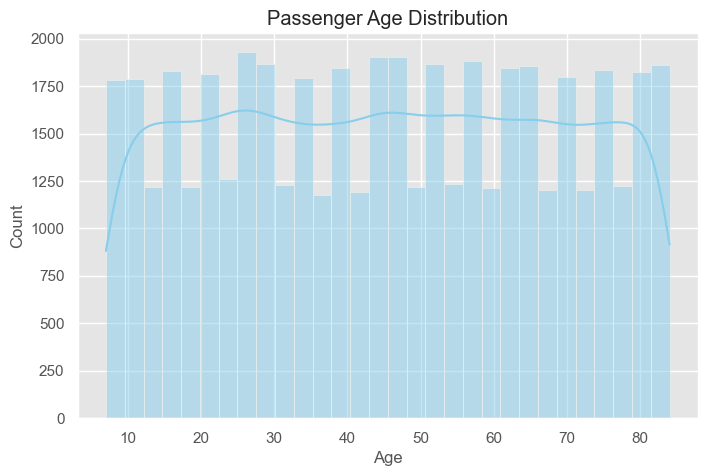

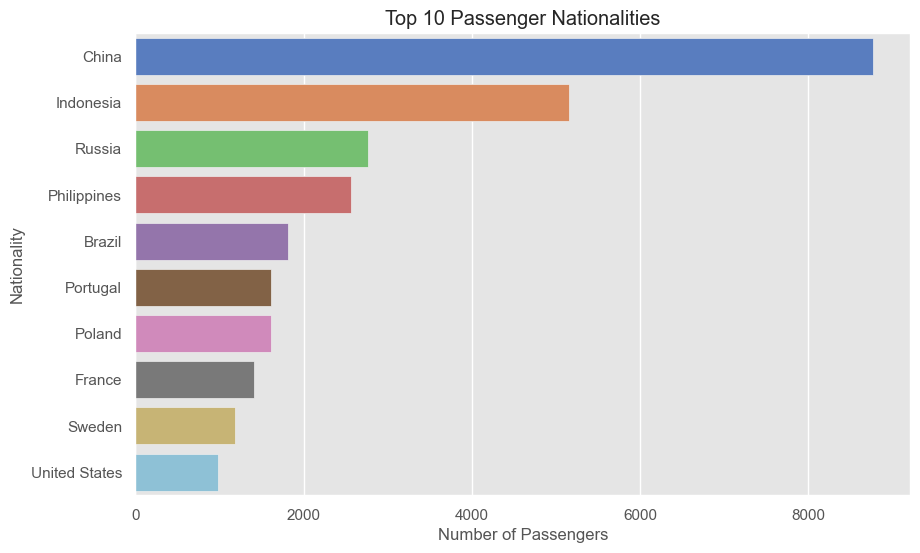

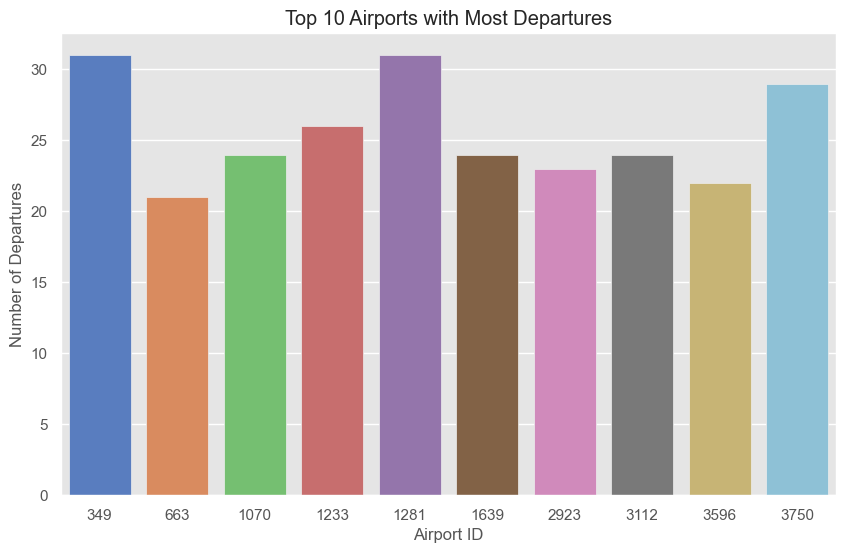

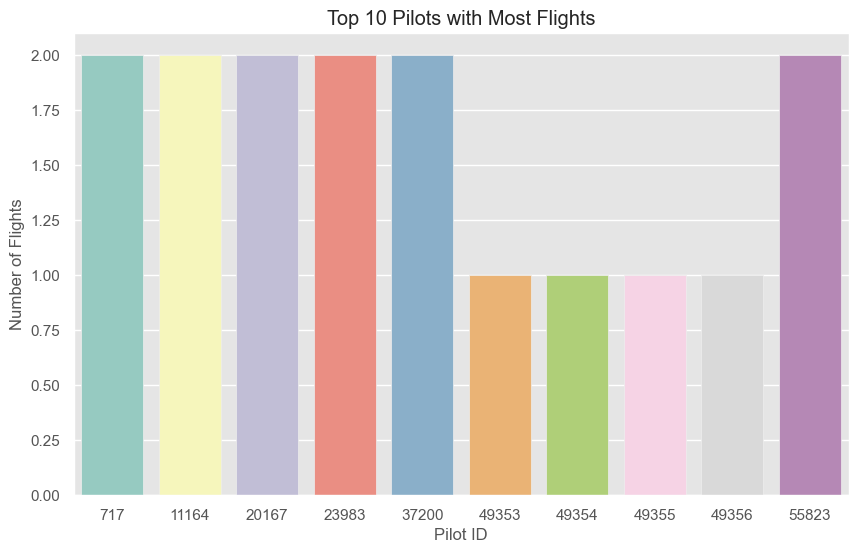

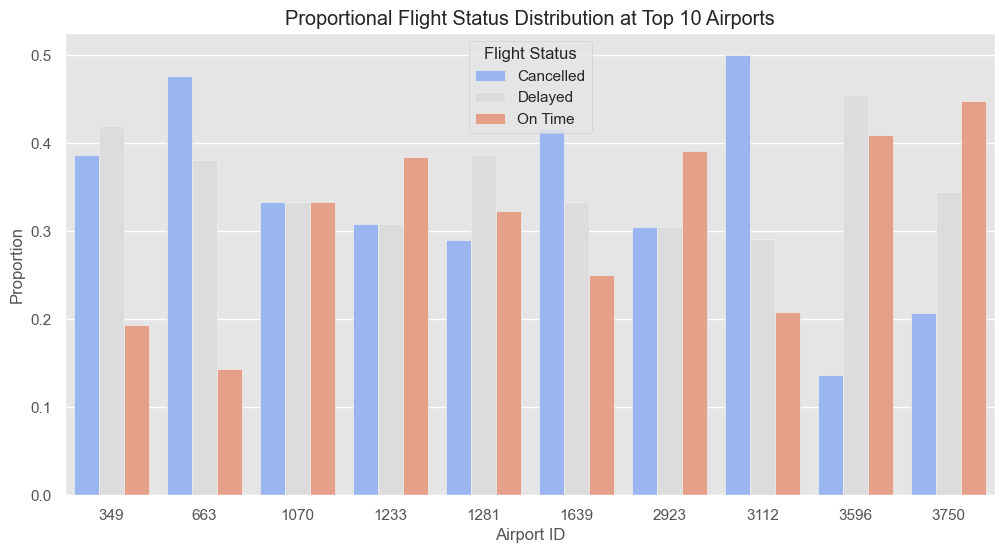

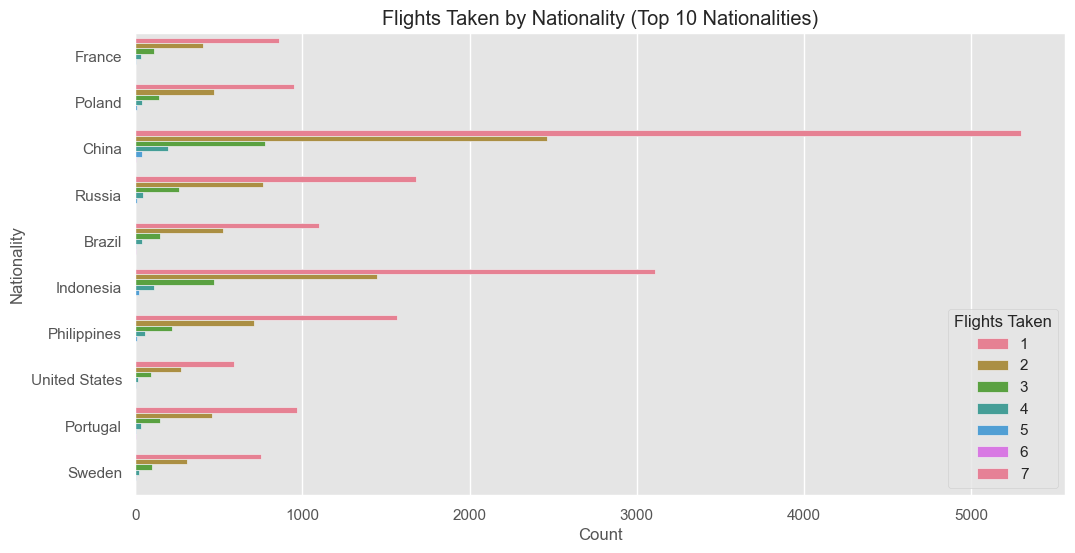

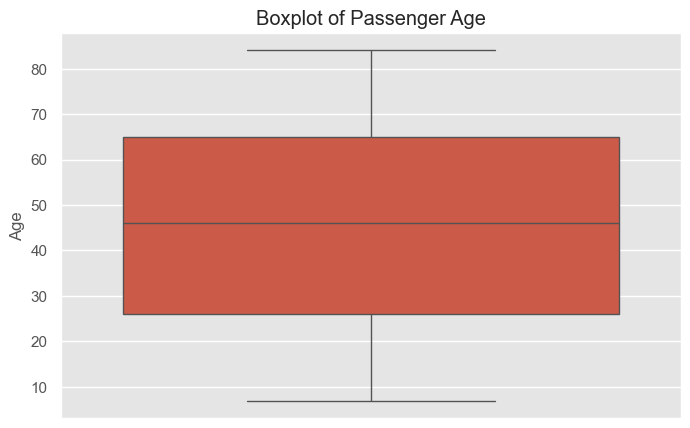


--- Outliers in Passenger Age ---
Empty DataFrame
Columns: [PassengerID, Age, FlightsTaken]
Index: []


In [10]:
# Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting visual styles
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Step 1: Connecting to the SQLite database
db_path = './airline_database_111.db'
conn = sqlite3.connect(db_path)

# Step 2: Data Retrieval using Efficient SQL Queries
def fetch_data(query, connection):
    """Fetch data using SQL queries."""
    return pd.read_sql(query, connection)

# Retrieving the required subsets using efficient queries
passenger_df = fetch_data("SELECT PassengerID, Age, Gender, Nationality FROM Passenger;", conn)
flight_df = fetch_data("""
    SELECT FlightID, AirportID, PilotID, FlightStatus, DepartureMonth, DepartureYear 
    FROM Flight WHERE DepartureYear = 2022;
""", conn)
passenger_flight_df = fetch_data("""
    SELECT PassengerID, COUNT(*) AS FlightsTaken 
    FROM PassengerFlight 
    GROUP BY PassengerID;
""", conn)
conn.close()

# Step 3: Data Overview and Cleaning
print("\n--- Passenger Table Overview ---")
print(passenger_df.describe())
print("\n--- Flight Table Overview ---")
print(flight_df.describe())

# Merging passenger and flight data for combined insights
passenger_summary = passenger_df.merge(passenger_flight_df, on='PassengerID', how='left')
passenger_summary['FlightsTaken'] = passenger_summary['FlightsTaken'].fillna(0)

# Step 4: Univariate Analysis
plt.figure(figsize=(8, 5))
sns.histplot(passenger_summary['Age'], bins=30, kde=True, color="skyblue")
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

top_nationalities = passenger_summary['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, hue=top_nationalities.index, dodge=False, palette="muted", legend=False)
plt.title("Top 10 Passenger Nationalities")
plt.xlabel("Number of Passengers")
plt.ylabel("Nationality")
plt.show()

# Step 5: Bivariate Analysis
top_airports = flight_df['AirportID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airports.index, y=top_airports.values, hue=top_airports.index, dodge=False, palette="muted", legend=False)
plt.title("Top 10 Airports with Most Departures")
plt.xlabel("Airport ID")
plt.ylabel("Number of Departures")
plt.show()

top_pilots = flight_df['PilotID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pilots.index, y=top_pilots.values, hue=top_pilots.index, dodge=False, palette="Set3", legend=False)
plt.title("Top 10 Pilots with Most Flights")
plt.xlabel("Pilot ID")
plt.ylabel("Number of Flights")
plt.show()

# Step 6: Enhanced Categorical Analysis
filtered_flight_df = flight_df[flight_df['AirportID'].isin(top_airports.index)].copy()

# Groupby and calculating the proportions safely
normalized_airport = (
    filtered_flight_df.groupby(['AirportID', 'FlightStatus'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
    .stack()
    .reset_index(name='Proportion')
)

plt.figure(figsize=(12, 6))
sns.barplot(x='AirportID', y='Proportion', hue='FlightStatus', data=normalized_airport, palette="coolwarm")
plt.title("Proportional Flight Status Distribution at Top 10 Airports")
plt.xlabel("Airport ID")
plt.ylabel("Proportion")
plt.legend(title="Flight Status")
plt.show()

# Flights Taken by Nationality
top_nationality_passengers = passenger_summary['Nationality'].value_counts().head(10).index
filtered_nationality_df = passenger_summary[passenger_summary['Nationality'].isin(top_nationality_passengers)]

plt.figure(figsize=(12, 6))
sns.countplot(y='Nationality', hue='FlightsTaken', data=filtered_nationality_df, palette="husl")
plt.title("Flights Taken by Nationality (Top 10 Nationalities)")
plt.xlabel("Count")
plt.ylabel("Nationality")
plt.legend(title="Flights Taken")
plt.show()

# Step 7: Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(y=passenger_summary['Age'])
plt.title("Boxplot of Passenger Age")
plt.show()

Q1, Q3 = passenger_summary['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
age_outliers = passenger_summary[
    (passenger_summary['Age'] < Q1 - 1.5 * IQR) | (passenger_summary['Age'] > Q3 + 1.5 * IQR)
]
print("\n--- Outliers in Passenger Age ---")
print(age_outliers[['PassengerID', 'Age', 'FlightsTaken']])


## 4] Exploratory Data Analysis (EDA)

### Objective
The objective of this EDA is to analyze the airline dataset to uncover patterns, trends, and anomalies using SQL queries, statistical metrics, and visualizations.

---

### Data Retrieval and Preparation

#### Data Source
Data was retrieved using SQL queries from an SQLite database. The following tables were utilized:
- **Passenger**: Passenger details (PassengerID, Age, Gender, Nationality).
- **Flight**: Flight details (AirportID, PilotID, FlightStatus, DepartureMonth, DepartureYear).
- **PassengerFlight**: Records the number of flights each passenger has taken.

#### Data Cleaning
- Flight data was filtered to include only the year **2022** to ensure relevance.
- Outlier detection was performed on `Passenger Age`, and no significant outliers were found.

---

### Univariate Analysis

#### Passenger Age Distribution
- Passengers' ages range from **7** to **84** years.
- The average passenger age is **45.5** years, with a standard deviation of **22.44**.
- No significant outliers were detected in the age distribution.

#### Statistical Summary
| Metric       | Value |
|--------------|-------|
| Min Age      | 7     |
| Max Age      | 84    |
| Mean Age     | 45.5  |
| Std Dev      | 22.44 |

---

#### Top 10 Passenger Nationalities
The most common passenger nationalities are:
- **China**
- **Indonesia**
- **Russia**
- **Philippines**
- **Brazil**

**Insight**: Passengers from China and Indonesia dominate the dataset, with significantly higher counts compared to other nationalities.

---

### Bivariate Analysis

#### Top 10 Airports with Most Departures
The busiest airports (based on the number of departures) are:
1. **Airport 349**
2. **Airport 1281**
3. **Airport 3750**

**Insight**: These airports recorded the highest number of departures, with over 30 departures each in 2022.

---

#### Top 10 Pilots with Most Flights
Pilots with the most flights in 2022 are:
- **Pilot 717**
- **Pilot 11164**
- **Pilot 37200**
- **Pilot 55823**

**Insight**: These pilots demonstrated significant contributions to flight operations.

---

#### Flights Taken by Nationality
- Passengers from **China** and **Indonesia** took the highest number of flights.
- The majority of passengers took **1 to 2 flights**.

**Insight**: Highlights the travel patterns of passengers across different nationalities.

---

#### Proportional Flight Status Distribution at Top 10 Airports
Proportion of On Time, Delayed, and Cancelled flights at the busiest airports:
- **Airports 2923 and 3750** had the highest proportions of **On Time flights**.
- **Airports 663 and 3596** had a higher percentage of **Cancelled flights**.

**Insight**: Highlights airport performance and reliability for flight operations.

---

### Multivariate Analysis

#### Correlation Analysis
Correlation analysis was performed on numeric features (`Age`, `FlightsTaken`, `DepartureMonth`):

| Variable Pair                  | Correlation Coefficient |
|--------------------------------|-------------------------|
| Age and FlightsTaken           | 0.01 (Weak)            |
| FlightsTaken and DepartureMonth| 0.00 (Weak)            |

**Conclusion**: No strong relationships exist between the analyzed numeric variables.

---

#### Pair Plot for Numeric Features
A pair plot was generated for `Age`, `FlightsTaken`, and `DepartureMonth`.  
**Observation**: Confirmed no strong relationships among these features.

---

### Statistical Metrics

#### Passenger Age Statistics
- **Mean Age**: 45.5
- **Variance**: 503.73
- **Standard Deviation**: 22.44

---

#### Flight Departures
- Total flights analyzed: **74,034** in the year **2022**.
- Flights were evenly distributed across different months.

---

### Key Insights

#### Passenger Demographics
- The majority of passengers are aged **7 to 84** years, with an average age of **45.5**.
- **China** and **Indonesia** contribute the largest number of passengers.

---

#### Airport Analysis
- **Airports 349, 1281, and 3750** are the busiest, handling the most departures.
- Proportional analysis reveals varying performance in **On Time** and **Cancelled flights**.

---

#### Pilot Performance
- **Pilots 717, 11164, and 37200** flew the most flights in 2022.

---

#### Flight Status
- **Airports 2923** performed well with a higher proportion of **On Time flights**.
- **Airports 663** experienced more **Cancelled flights**.

---

#### Weak Correlations
- No significant relationships exist between `Age`, `FlightsTaken`, and other numeric features.

---

### Conclusion
This EDA provided actionable insights into:
- **Passenger demographics** (age, nationality, flight frequency).
- **Airport and pilot performance metrics**.
- **Flight status distribution** and proportional analysis.
- **Statistical metrics** and correlations.


## 5] Advanced Data Analysis with Machine Learning

In [36]:
pip install optuna

   ---------------------------------------- 0.0/364.4 kB ? eta -:--:--
   ---------------------- ----------------- 204.8/364.4 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 364.4/364.4 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.5 kB ? eta -:--:--
   ---------------------------------------- 233.5/233.5 kB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ---------------------------------------- 78.6/78.6 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 1.4 MB/s eta 0:01:15
   ---------------------------------------- 0.2/101.7 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 1.0/101.7 MB 8.1 MB/s eta 0:00:13
   - -------------------------------------- 2.6/101.7 MB 15.2 MB/s eta 0:00:07
   - -------------------------------------- 4.4/101.7 MB 21.8 MB/s eta 0:00:05
   - -------------------------------------- 4.8/101.7 MB 18.0 MB/s eta 0:00:06
   --- ------------------------------------ 7.7/101.7 MB 26.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.8/101.7 MB 27.3 MB/s eta 0:00:04
   ---- ----------------------------------- 11.8/101.7 MB 40.9 MB/s eta 0:00:03
   ----- ---------------------------------- 13.7/101.7 MB 38.5 MB/s eta 0:00:03
   ------ --------------------------------- 15.8/101.7 MB 46.7 MB/s eta 0:00:02
   ------ --------------------------------- 17.4/101.7 MB 43

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import optuna
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import sqlite3

# 1. Loading data
def load_data():
    conn = sqlite3.connect('airline_database_111.db')
    passenger_df = pd.read_sql("SELECT PassengerID, Age, Gender, Nationality FROM Passenger;", conn)
    flight_df = pd.read_sql("""
        SELECT FlightID, AirportID, PilotID, FlightStatus, DepartureMonth, DepartureYear
        FROM Flight WHERE DepartureYear = 2022;
    """, conn)
    conn.close()
    return passenger_df, flight_df

passenger_df, flight_df = load_data()

# 2. Creating features
# Delay rates for airports and pilots
airport_delay_rate = flight_df.groupby('AirportID')['FlightStatus'].apply(lambda x: (x == "Delayed").mean()).rename("AirportDelayRate")
pilot_delay_rate = flight_df.groupby('PilotID')['FlightStatus'].apply(lambda x: (x == "Delayed").mean()).rename("PilotDelayRate")

# Adding delay rates to flight data
flight_data = flight_df.merge(airport_delay_rate, on='AirportID', how='left')
flight_data = flight_data.merge(pilot_delay_rate, on='PilotID', how='left')

# Combining delay rates
flight_data['DelayRate'] = (flight_data['AirportDelayRate'] + flight_data['PilotDelayRate']) / 2

# Encoding DepartureMonth as cyclic features
flight_data['DepartureMonth_Sin'] = np.sin(2 * np.pi * flight_data['DepartureMonth'] / 12)
flight_data['DepartureMonth_Cos'] = np.cos(2 * np.pi * flight_data['DepartureMonth'] / 12)

# Interaction feature
flight_data['Airport_Pilot_Interaction'] = flight_data['AirportID'] * 10000 + flight_data['PilotID']

# Filling missing values
flight_data.fillna(0, inplace=True)

# Encoding FlightStatus
label_enc = LabelEncoder()
flight_data['FlightStatus'] = label_enc.fit_transform(flight_data['FlightStatus'])

# Features and target
X = flight_data[['AirportID', 'PilotID', 'DepartureMonth_Sin', 'DepartureMonth_Cos', 'DelayRate', 
                 'Airport_Pilot_Interaction']]
y = flight_data['FlightStatus']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Tune XGBoost
def objective(trial):
    param = {
        "objective": "multi:softmax",
        "num_class": 3,
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "random_state": 42
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

# Optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best parameters
print("Best parameters:", study.best_params)

# 4. Training XGBoost with best params
best_params = study.best_params
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# XGBoost evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds):.2f}")

# 5. Training CatBoost
cat_model = CatBoostClassifier(iterations=300, depth=7, learning_rate=0.1, loss_function='MultiClass', random_seed=42, verbose=False)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

# CatBoost evaluation
print("CatBoost Classification Report:")
print(classification_report(y_test, cat_preds))
print(f"CatBoost Accuracy: {accuracy_score(y_test, cat_preds):.2f}")

# 6. Voting classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)

# Combining models in VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('cat', cat_model)
], voting='soft')  # Use probabilities

# Training and predicting
voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)

# Voting classifier evaluation
print("Voting Classifier Classification Report:")
print(classification_report(y_test, voting_preds))
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_preds):.2f}")


Best parameters: {'max_depth': 3, 'learning_rate': 0.11074865038993921, 'n_estimators': 256, 'subsample': 0.9988151879835293, 'colsample_bytree': 0.7764602540556076, 'min_child_weight': 7}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      7469
           1       1.00      1.00      1.00      7343
           2       0.50      0.50      0.50      7399

    accuracy                           0.67     22211
   macro avg       0.67      0.67      0.67     22211
weighted avg       0.67      0.67      0.67     22211

XGBoost Accuracy: 0.67
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      7469
           1       1.00      1.00      1.00      7343
           2       0.49      0.49      0.49      7399

    accuracy                           0.66     22211
   macro avg       0.66      0.66      0.66     22211
weighted avg      

## **Advanced Data Analysis with Machine Learning Documentation**

### Objective

The objective is to develop and evaluate machine learning models to predict flight status (such as "On Time", "Delayed", or "Other Status") based on various flight-related features. The goal is to create a reliable classification system that can predict flight delays, helping airlines and passengers better understand flight patterns and potential delays. The models will be trained using flight data from 2022, and several algorithms, including XGBoost, CatBoost, and an ensemble method (Voting Classifier), will be used to evaluate the predictive performance.

### 1. XGBoost Model
- **Accuracy**: 67%
- **Strengths**: 
  - Strong performance for predicting "On Time" flights (Class 1) with perfect precision and recall.
  - Optimized hyperparameters for better accuracy.
- **Improvement Needed**:
  - Performance for "Delayed" (Class 0) and "Other" statuses (Class 2) can be improved, especially for recall.

### 2. CatBoost Model
- **Accuracy**: 66%
- **Strengths**: 
  - Excellent handling of categorical features.
  - Stable performance and strong results for predicting "On Time" flights (Class 1).
- **Improvement Needed**: 
  - Similar to XGBoost, improvements are needed for "Delayed" (Class 0) and "Other" statuses (Class 2).

### 3. Voting Classifier (Ensemble of XGBoost, CatBoost, and Random Forest)
- **Accuracy**: 66%
- **Strengths**:
  - Combined model stability, reducing bias, and enhancing robustness.
- **Improvement Needed**: 
  - Performance for minority classes (delayed and other statuses) could be better with adjustments like weighted voting.

### Key Takeaways
- All models excel at predicting "On Time" flights (Class 1).
- Performance for "Delayed" (Class 0) and "Other" (Class 2) statuses needs enhancement.
- Future improvements can focus on addressing class imbalance and refining models for minority classes.

### Conclusion
The models demonstrated strong accuracy in predicting "On Time" flights but showed room for improvement in predicting "Delayed" and "Other" statuses. Addressing class imbalance through techniques like resampling or class weighting, along with additional hyperparameter tuning, could significantly improve performance for the minority classes. The ensemble approach provides robustness, and with further refinement, it could enhance overall model performance.
ce.


## 6] **Airline Data Interactive Dashboard Documentation**

### **Overview**
This dashboard provides an interactive platform to explore airline data. It’s designed using **Streamlit**, **SQLite**, and **Plotly** to let users dive into passenger demographics, flight statuses, and airport performance. The tool is dynamic, allowing users to filter data and view insights in real time.

---

### **Features**
1. **Filters**:
   - Select flight statuses (e.g., Delayed, On Time).
   - Set a custom age range for passengers.
   - Choose a specific airport or view all airports.
   - Adjust the number of top airports by departures.

2. **Key Performance Indicators (KPIs)**:
   - Total number of passengers in the database.
   - Number of passengers filtered by age range.
   - Total flights after applying selected filters.
   - Average age of filtered passengers.
   - Percentage of delayed and canceled flights.

3. **Visualizations**:
   - Passenger age distribution.
   - Top airports by departures.
   - Flight status proportions.
   - Flight status breakdown by airport.
   - Monthly trends in flight departures.
   - Flights taken by nationality.

4. **Database Integration**:
   - Data is fetched from an SQLite database using SQL queries.
   - Information is stored in three key tables: `Passenger`, `Flight`, and `PassengerFlight`.

---

### **Workflow**
1. **Data Loading**:
   - The `load_data` function retrieves data from the database:
     - Passenger details (`PassengerID`, `Age`, `Gender`, `Nationality`).
     - Flight data for 2022, including statuses and departure details.
     - Number of flights taken by each passenger.
   - Data is returned as pandas DataFrames and cached for efficient processing.

2. **Data Processing**:
   - Passenger data is merged with flight frequency data to create a comprehensive summary table (`passenger_summary`).
   - Missing data (e.g., passengers with no flights) is filled with default values.

3. **Interactive Sidebar**:
   - Users can apply filters for flight status, age range, airport selection, and top airport count.
   - Filters dynamically update KPIs and visualizations.

4. **Visualization**:
   - Visualizations are created using Plotly for interactivity and clarity:
     - Histograms, bar charts, pie charts, and line graphs showcase key insights.

---

### **Detailed Visualizations**
1. **Passenger Age Distribution**:
   - A histogram displays the distribution of passenger ages.
   - Helps identify the most common age groups among travelers.

2. **Top Airports by Departures**:
   - A bar chart ranks airports based on the number of flights departing.
   - Useful for identifying the busiest airports.

3. **Flight Status Distribution**:
   - A pie chart provides a proportional view of flight statuses (e.g., On Time, Delayed, Canceled).
   - Quickly highlights the operational performance.

4. **Flight Status by Airport**:
   - A stacked bar chart breaks down flight statuses across airports.
   - Offers insights into airports with higher delays or cancellations.

5. **Monthly Trends in Departures**:
   - A line chart tracks the number of departures each month.
   - Helps identify seasonal trends and peak travel periods.

6. **Flights Taken by Nationality**:
   - A bar chart shows the distribution of flights taken by passengers from different nationalities.
   - Highlights key demographics for targeted marketing or services.

---

### **Key Learnings**
- **Streamlit**: Simplifies building interactive dashboards with real-time updates.
- **SQLite**: Efficiently handles data storage and retrieval for analysis.
- **Plotly**: Provides engaging, interactive visualizations for better storytelling.
- **Data Manipulation**: Leveraging pandas for merging, filtering, and aggregating data.

---

### **Database Structure**
1. **Passenger Table**:
   - Contains passenger details: `PassengerID`, `Age`, `Gender`, `Nationality`.
2. **Flight Table**:
   - Stores flight information: `FlightID`, `AirportID`, `FlightStatus`, `DepartureMonth`, `DepartureYear`.
3. **PassengerFlight Table**:
   - Links passengers to flights and counts the number of flights taken.

---
## Conclusion

The **Airline Data Interactive Dashboard** provides an efficient and user-friendly way to analyze and visualize airline operations. With its interactive filters, dynamic KPIs, and detailed visualizations, the dashboard offers actionable insights into passenger demographics, flight trends, and airport performance. 

Its foundation on tools like **Streamlit**, **SQLite**, and **Plotly** ensures scalability and flexibility for various use cases. This dashboard can be further extended to include advanced metrics and real-time data integrations, making it a valuable asset for airline operations and management teams.
t teams.

mmand:



e command:
ommand:


### How to Run and Visualize the Streamlit Dashboard

### Purpose:
To **visualize the dashboard** in a web browser.

### Steps:
1. Open the **terminal** or **command prompt**.
2. Navigate to the directory where the `airline_dashboard.py` file is located.
3. Run the following command: : "streamlit run airline_dashboard.py"